In [1]:
%matplotlib inline


# Regularization path of L1- Logistic Regression


Train l1-penalized logistic regression models on a binary classification
problem derived from the Iris dataset.

The models are ordered from strongest regularized to least regularized. The 4
coefficients of the models are collected and plotted as a "regularization
path": on the left-hand side of the figure (strong regularizers), all the
coefficients are exactly 0. When regularization gets progressively looser,
coefficients can get non-zero values one after the other.

Here we choose the liblinear solver because it can efficiently optimize for the
Logistic Regression loss with a non-smooth, sparsity inducing l1 penalty.

Also note that we set a low value for the tolerance to make sure that the model
has converged before collecting the coefficients.

We also use warm_start=True which means that the coefficients of the models are
reused to initialize the next model fit to speed-up the computation of the
full-path.


In [2]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

## Load data



In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X /= X.max()  # Normalize X to speed-up convergence

## Compute regularization path



In [4]:
import numpy as np

from sklearn import linear_model
from sklearn.svm import l1_min_c

cs = l1_min_c(X, y, loss="log") * np.logspace(0, 7, 16)

clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

## Plot regularization path



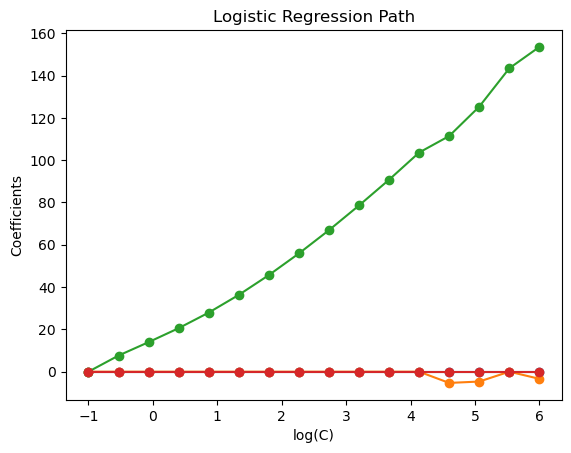

In [5]:
import matplotlib.pyplot as plt

plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()